In [16]:
import config_utils
import file_utils
import mapping
import naming_utils
import numpy as np
from os.path import join, isfile, isdir
from matplotlib import pyplot as plt

pede_path = {-20:'/data/commissioning/pedestal_scan/2020_07_09_010', 
             -23:'/data/commissioning/pedestal_scan/2020_07_09_003', 
             -25:'/data/commissioning/pedestal_scan/2020_07_09_005', 
             -30:'/data/commissioning/pedestal_scan/2020_07_09_007'}

rawpede_path = {-20:'/data/commissioning/pedestal_scan/2020_07_09_002', 
                -25:'/data/commissioning/pedestal_scan/2020_07_09_004', 
                -30:'/data/commissioning/pedestal_scan/2020_07_09_006'}
dhes = [
                '1012','1082','1022','2042',
                '1062','1072','2052','1042','1052',
                '1071','1061','2051','1041','1051',
                '1011','1031','1081','2041','1021'
                #,'1032'
]
dhes = ['H%s'%dhe for dhe in sorted(dhes)]


In [56]:
noise_mean = {}
noise_std = {}
for T in pede_path.keys():
    noise_mean[T] = []
    noise_std[T] = []

noise={}

for dhe in dhes:
    for i, T in enumerate(sorted(pede_path.keys())):
        f = join(pede_path[T],dhe,'results.npy')
        if not isfile(f):
            print('no file:',f)
            continue
        ana = np.load(f).item()
        if i==0:
            noise[dhe] = ana['noise']
        else:
            noise[dhe] = np.dstack((noise[dhe],ana['noise']))
        
#         print(ana.keys(), ana['noise'].shape, np.nanmean(ana['noise']),'+/-', np.std(ana['noise']))
        noise_mean[T].append(np.nanmean(ana['noise']))
        noise_std[T].append(np.std(ana['noise']))
        
# print(noise_mean)
# print(noise_std)

    print(dhe, noise[dhe].shape)

H1011 (768, 256, 4)
H1012 (768, 256, 4)
H1021 (768, 256, 4)
H1022 (768, 256, 4)
H1031 (768, 256, 4)
H1041 (768, 256, 4)
H1042 (768, 256, 4)
H1051 (768, 256, 4)
H1052 (768, 256, 4)
H1061 (768, 256, 4)
H1062 (768, 256, 4)
H1071 (768, 256, 4)
H1072 (768, 256, 4)
H1081 (768, 256, 4)
H1082 (768, 256, 4)
H2041 (768, 256, 4)
H2042 (768, 256, 4)
H2051 (768, 256, 4)
H2052 (768, 256, 4)


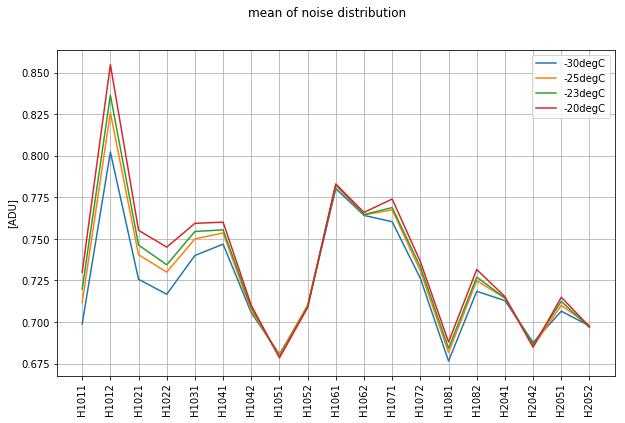

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('mean of noise distribution')
x = np.arange(len(dhes))

for T in sorted(pede_path.keys()):
    ax.plot(x, noise_mean[T], label='%sdegC'%T)
#     ax.errorbar(x, noise_mean[T], yerr=noise_std[T], label='%sdegC'%T)

plt.xticks(x, dhes, rotation='vertical')
ax.set_ylabel('[ADU]')
ax.legend()
ax.grid()

In [55]:
a=np.arange(10).reshape(2,5)
b=np.arange(10,20).reshape(2,5)
c=np.arange(20,30).reshape(2,5)

print(a.shape, b.shape, c.shape)


a = np.dstack((a,b))
print(a.shape, a)
a = np.dstack((a,c))
print(a.shape, a)

print(a[:,:,2] - a[:,:,0])


((2, 5), (2, 5), (2, 5))
((2, 5, 2), array([[[ 0, 10],
        [ 1, 11],
        [ 2, 12],
        [ 3, 13],
        [ 4, 14]],

       [[ 5, 15],
        [ 6, 16],
        [ 7, 17],
        [ 8, 18],
        [ 9, 19]]]))
((2, 5, 3), array([[[ 0, 10, 20],
        [ 1, 11, 21],
        [ 2, 12, 22],
        [ 3, 13, 23],
        [ 4, 14, 24]],

       [[ 5, 15, 25],
        [ 6, 16, 26],
        [ 7, 17, 27],
        [ 8, 18, 28],
        [ 9, 19, 29]]]))
[[20 20 20 20 20]
 [20 20 20 20 20]]
